# DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import math as math
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.



### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.



### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the doller sign.



### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.



### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.



### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)



### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
######            Children < 18
######            Youth 18-30
######            Adult 30-60
######            Senior > 60



### 8. What is the average amount claimed by the customers from various segments?



### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.



### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 



### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.



### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.



### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.



### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 



### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 



### 16. Is there any similarity in the amount claimed by males and females?



### 17. Is there any relationship between age category and segment?



### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000.


### 19. Is there any difference between age groups and insurance claims?



### 20. Is ther any relationship between total number of policy claims and the claimed amount?

## Importing datasets

In [2]:
claims = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_3_Insurance_Claims_Case_Study/Case_Study_3_Insurance_Claims_Case_Study/claims.csv")
demo = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Python_Foundation_Case_Study_3_Insurance_Claims_Case_Study/Case_Study_3_Insurance_Claims_Case_Study/cust_demographics.csv")

In [3]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [5]:
claims.duplicated().sum()

0

In [6]:
# Both "claim_amount" and "total_policy_claims"have null values
claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [7]:
# Changing "claim_date" to datetime 
claims['claim_date'] = pd.to_datetime(claims.claim_date)

In [8]:
claims.nunique()

claim_id               1100
customer_id            1093
incident_cause            5
claim_date              100
claim_area                2
police_report             3
claim_type                3
claim_amount            683
total_policy_claims       8
fraudulent                2
dtype: int64

In [9]:
#Both "claim_id" and "customer_id" are categorical veriables so changing them to object type
claims['claim_id'] = claims['claim_id'].astype(object)
claims['customer_id'] = claims['customer_id'].astype(object)

In [10]:
# "claim_amount" is categorical veriable so changeing this to float after removing "$" sign.
claims['claim_amount'] = claims['claim_amount'].str.slice(1).astype(float)

In [11]:
claims.describe()

,claim_amount,total_policy_claims
count,1035.000000,1090.000000
mean,12442.125121,1.591743
std,13766.391982,1.147251
min,1000.000000,1.000000
25%,1870.000000,1.000000
50%,2740.000000,1.000000
75%,24300.000000,2.000000
max,48150.500000,8.000000


In [12]:
demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [13]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [14]:
demo.duplicated().sum()

0

In [15]:
demo.isna().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [16]:
demo.nunique()

CUST_ID        1085
gender            2
DateOfBirth    1085
State            50
Contact        1085
Segment           3
dtype: int64

In [17]:
# "CUST_ID" is categorical veriable so changeing to object datatype

demo['CUST_ID'] = demo['CUST_ID'].astype(object)

In [18]:
# "DateOfBirth" is continous veriable so changeing to datetime datatype

demo['DateOfBirth'] = pd.to_datetime(demo['DateOfBirth'])



# Some dates are showing for year 2060 and above, we need to correct them
demo.loc[demo['DateOfBirth'].dt.year >= 2060, 'DateOfBirth'] = demo.loc[demo['DateOfBirth'].dt.year >2000, 'DateOfBirth'] - pd.DateOffset(years=100)

In [19]:
# merging the two datasets
claims_demo = pd.merge(claims, demo, left_on='customer_id', right_on='CUST_ID', how='left')

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [20]:
# Already done

## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [21]:
# Already done and corrected

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [22]:
# Already done

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [23]:
# For this quary I am considering both "Injury only", "Material and injury"

claims_demo['Flag'] = np.where((claims_demo['claim_type']
                                .isin(["Injury only", "Material and injury"])) &  
                               (claims_demo['police_report'].isin(['No'])) == True, 1, 0)

## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [24]:
claims_demo = claims_demo.drop_duplicates(subset='customer_id', keep='first')

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [25]:
# Filling mean value for null "claim_amount"

claims_demo.loc[claims_demo['claim_amount'].isnull(), 'claim_amount'] = claims_demo.loc[claims_demo['claim_amount'].notnull(),'claim_amount'].sum()/claims_demo['claim_amount'].notnull().sum()

In [26]:
# Filling mode value for null "total_policy_claims"

claims_demo.loc[claims_demo['total_policy_claims'].isnull(), 'total_policy_claims'] = claims_demo['total_policy_claims'].mode()[0]

In [27]:
# Filling "CUST_ID" as per "customer_id"

claims_demo.loc[claims_demo['CUST_ID'].isnull(), 'CUST_ID'] = claims_demo.loc[claims_demo['CUST_ID'].isnull(), 'customer_id']

In [28]:
# Filling "gender" as per mode

claims_demo.loc[claims_demo['gender'].isnull(), 'gender'] = claims_demo['gender'].mode()[0]

In [29]:
# Filling the Date of birth with the median value of Date of birth
claims_demo.loc[claims_demo['DateOfBirth'].isnull() == True, 'DateOfBirth'] = pd.to_datetime(claims_demo.DateOfBirth.median())

In [30]:
# Filling the null values in "State" with mode
claims_demo.loc[claims_demo['State'].isnull() == True, 'State'] =  claims_demo.State.mode()[0]

In [31]:
# Filling the null values in "Segment" with mode
claims_demo.loc[claims_demo['Segment'].isnull() == True, 'Segment'] = claims_demo.Segment.mode()[0]

In [32]:
# Filling Contact with dummy contact number "123-456-7890"
claims_demo.loc[claims_demo['Contact'].isnull() == True, 'Contact'] = "123-456-7890"

In [33]:
claims_demo.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Flag                   0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [34]:
claims_demo['Age'] = (claims_demo.claim_date -claims_demo.DateOfBirth).dt.days/365.25

claims_demo['Age_group'] = np.NaN

In [35]:
claims_demo.loc[claims_demo['Age'] < 18,'Age_group'] = '<18'
claims_demo.loc[(claims_demo['Age'] >= 18) & (claims_demo['Age'] < 30), 'Age_group'] = '18-30'
claims_demo.loc[(claims_demo['Age'] >= 30) & (claims_demo['Age'] < 60), 'Age_group'] = '30-60'
claims_demo.loc[claims_demo['Age'] >= 60,'Age_group'] = '>60'

# 8. What is the average amount claimed by the customers from various segments?

In [36]:
claims_demo.groupby(by='Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12675.262946
Platinum,12368.233815
Silver,12267.349306


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [37]:
date = dt.date(year=2018, month=10, day=1)

In [38]:
date1 = pd.to_datetime(date)

In [39]:
date2 = date-pd.DateOffset(days=20)

In [40]:
A = claims_demo[(claims_demo['claim_date'] >= date2) & (claims_demo['claim_date'] < date1)]

In [41]:
A.groupby(by='incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,6840.00000
Driver error,14574.72714
Natural causes,8418.00000
Other causes,244960.72714
Other driver error,47599.50000


# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [42]:
claims_demo[(claims_demo['Age'] >=18) & (claims_demo['State'].isin(['TX', 'DE', 'AK'])) & (claims_demo['incident_cause'] == 'Driver error')]['customer_id'].count()

22

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [43]:
# To change values in scientific notation to numeric 
pd.options.display.float_format = '{:.2f}'.format

B = claims_demo.pivot_table(index='Segment', columns='gender', values='claim_amount', aggfunc='sum').reset_index()

In [44]:
B

gender,Segment,Female,Male
0,Gold,2109531.54,2783119.95
1,Platinum,2369323.09,2095609.32
2,Silver,1898223.45,2346279.41


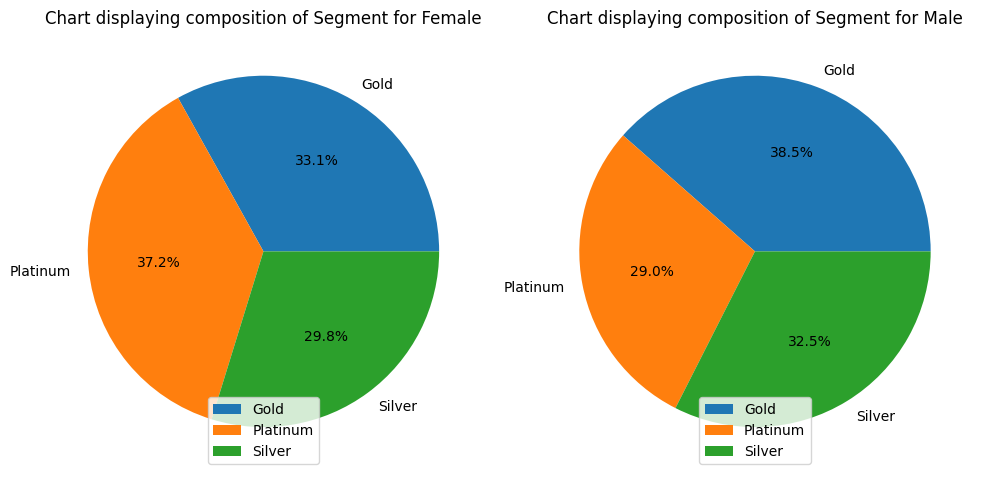

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Female
composition_female = B['Female']
axes[0].pie(composition_female, labels=['Gold', 'Platinum', 'Silver'], autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend(loc=8)
axes[0].set_title('Chart displaying composition of Segment for Female')

# Plot for Male
composition_male = B['Male']
axes[1].pie(composition_male, labels=['Gold', 'Platinum', 'Silver'], autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend(loc=8)
axes[1].set_title('Chart displaying composition of Segment for Male')

plt.tight_layout()
plt.show()


## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [46]:
C = claims_demo[claims_demo['incident_cause'] == 'Driver error'].groupby(by='gender')[['claim_amount']].sum().reset_index()

D = claims_demo[claims_demo['incident_cause'] == 'Driver error'].groupby(by='gender')[['claim_amount']].count().reset_index()

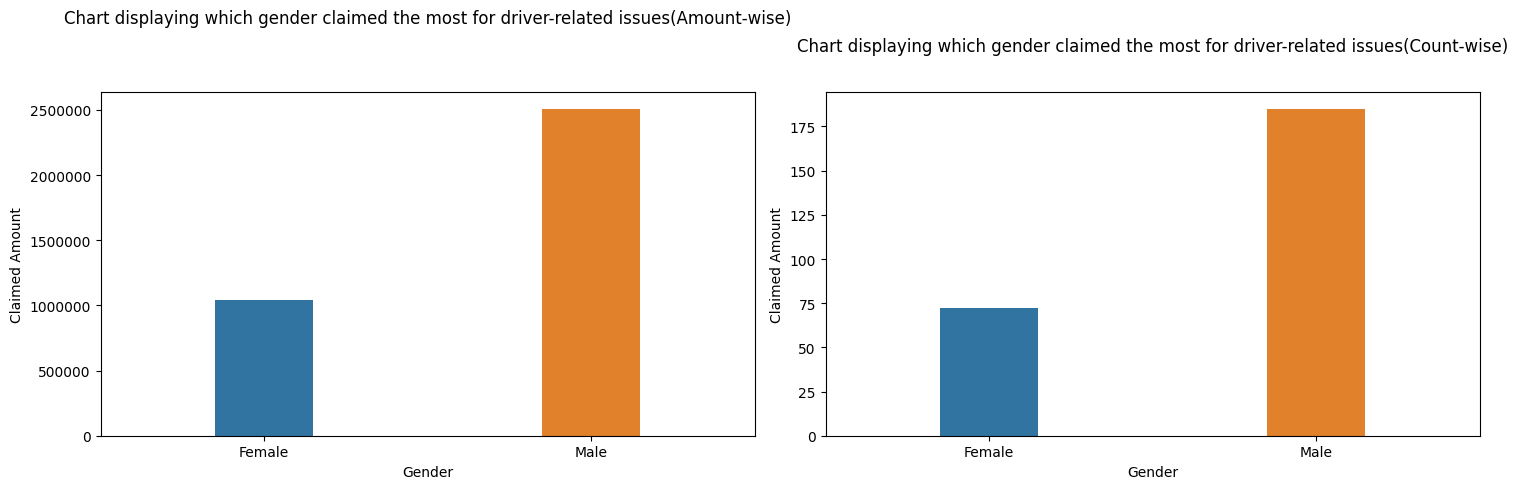

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x = C.gender, y= C.claim_amount, width=0.3)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Chart displaying which gender claimed the most for driver-related issues(Amount-wise)', pad=50)
plt.ylabel('Claimed Amount')
plt.xlabel('Gender')


plt.subplot(1,2,2)
sns.barplot(x = D.gender, y= D.claim_amount, width=0.3)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Chart displaying which gender claimed the most for driver-related issues(Count-wise)', pad=30)
plt.ylabel('Claimed Amount')
plt.xlabel('Gender')



plt.tight_layout()
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [48]:
E = claims_demo[claims_demo['fraudulent'] == 'Yes'].groupby(by='Age_group')[['fraudulent']].count().reset_index()

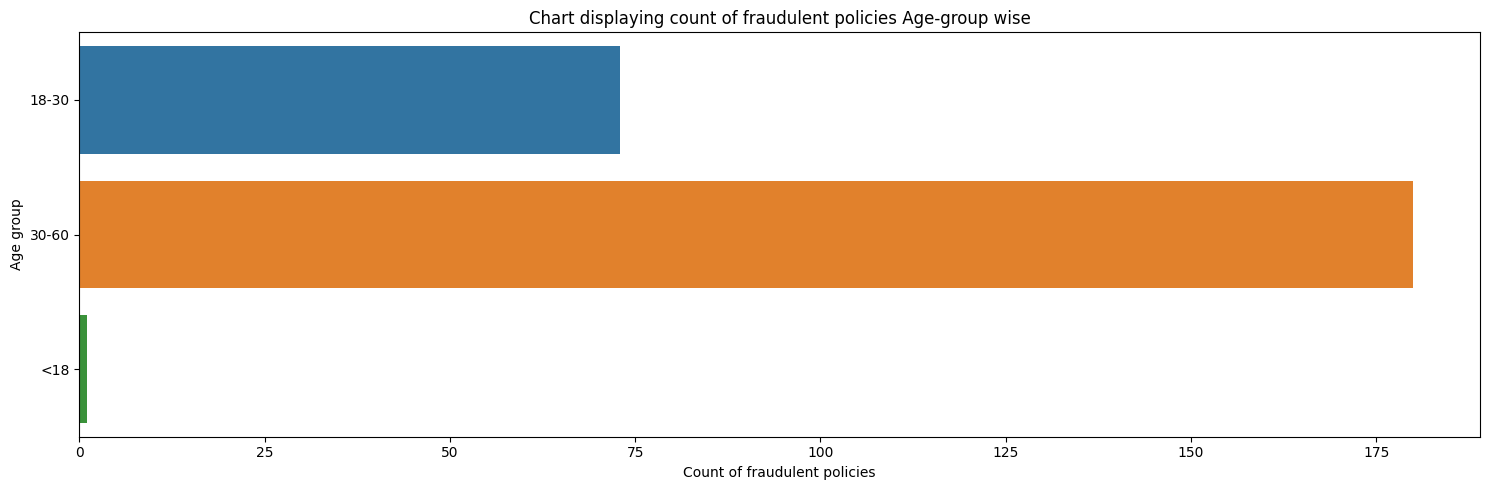

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(y=E.Age_group, x=E.fraudulent, orient='h')
plt.title('Chart displaying count of fraudulent policies Age-group wise')
plt.xlabel('Count of fraudulent policies')
plt.ylabel('Age group')
plt.tight_layout()
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [50]:
claims_demo['claim_month'] = claims_demo.claim_date.dt.month



F = claims_demo.groupby(by = [claims_demo['claim_date'].dt.month_name(), claims_demo.claim_month])[['claim_amount']].sum().reset_index().sort_values(by='claim_month')[['claim_date','claim_amount']]

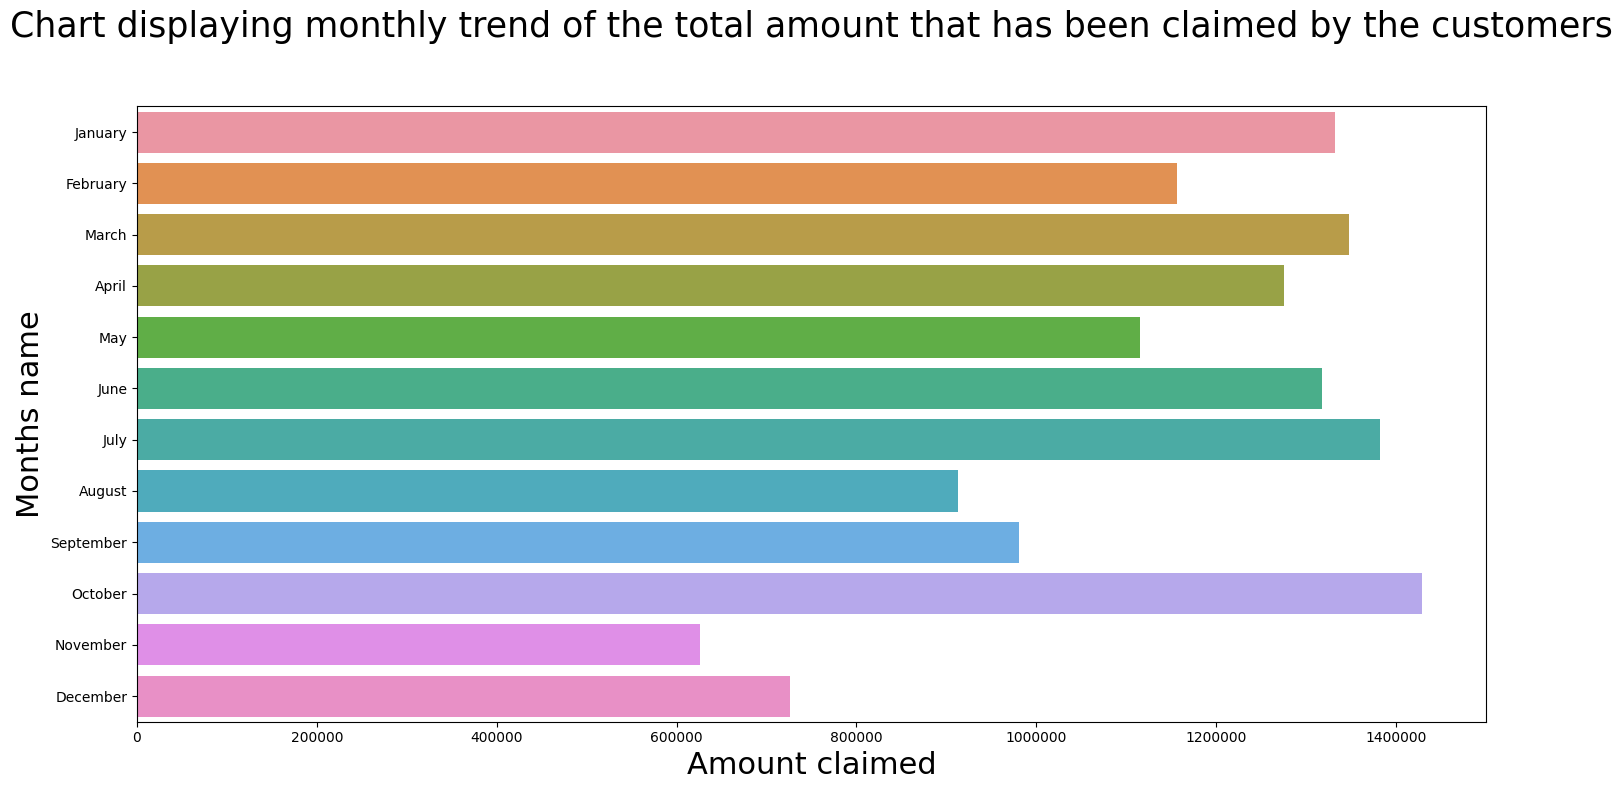

In [51]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(y=F.claim_date, x=F.claim_amount, orient='h')
plt.title('Chart displaying monthly trend of the total amount that has been claimed by the customers', pad=50, fontsize=25)
plt.xlabel('Amount claimed', fontsize=22)
plt.ylabel('Months name', fontsize=22)
plt.tight_layout()
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [52]:
I = claims_demo[claims_demo['fraudulent'] == 'Yes'].groupby(by=['gender','Age_group'])[['claim_amount']].sum().reset_index()

J = claims_demo[claims_demo['fraudulent'] == 'No'].groupby(by=['gender','Age_group'])[['claim_amount']].sum().reset_index()

In [53]:
I

,gender,Age_group,claim_amount
0,Female,18-30,273465.41
1,Female,30-60,1121432.86
2,Male,18-30,373490.68
3,Male,30-60,1489693.91
4,Male,<18,32407.00


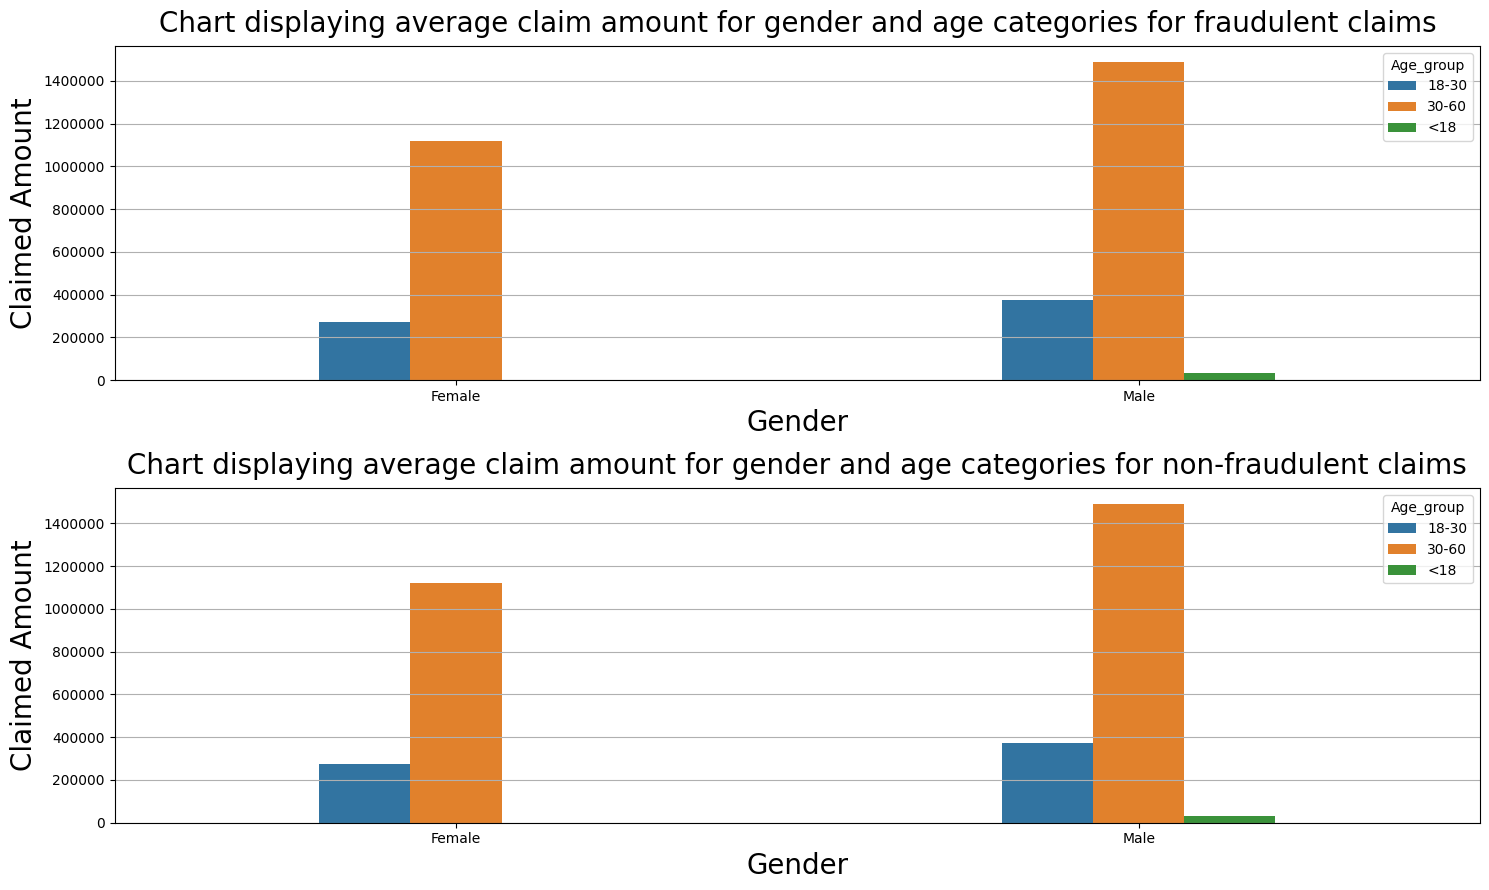

In [54]:
plt.figure(figsize=(15,9))

plt.subplot(2,1,1)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x=I.gender, y=I.claim_amount, hue=I.Age_group,width=0.4)
plt.grid(axis='y')
plt.title('Chart displaying average claim amount for gender and age categories for fraudulent claims', pad=10, fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Claimed Amount', fontsize=20)


plt.subplot(2,1,2)
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x=I.gender, y=I.claim_amount, hue=I.Age_group,width=0.4)
plt.grid(axis='y')
plt.title('Chart displaying average claim amount for gender and age categories for non-fraudulent claims', pad=10, fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Claimed Amount', fontsize=20)
plt.grid(axis='y')

plt.tight_layout()
plt.grid(axis='y')

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

## 16. Is there any similarity in the amount claimed by males and females?

In [55]:
#Comparing amount claimed by males and females
# We need to use Anova (f-test)


# First step - Get the data

claims_demo_male = claims_demo.loc[claims_demo['gender'] == 'Male', 'claim_amount']
claims_demo_female = claims_demo.loc[claims_demo['gender'] == 'Female', 'claim_amount']

# In the below boxplots, we can clearly see there is no outliers in the data 

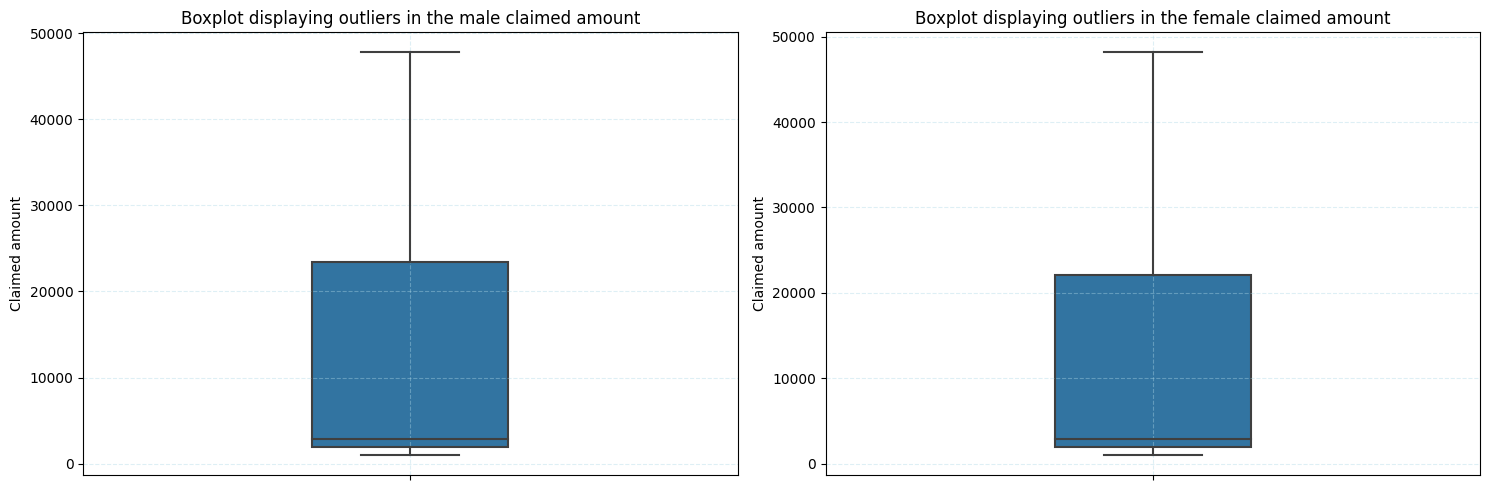

In [56]:
# To visualize if there is any Outlier in the data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(y=claims_demo_male, width=0.3)
plt.title('Boxplot displaying outliers in the male claimed amount')
plt.ylabel('Claimed amount')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')


plt.subplot(1,2,2)
sns.boxplot(y=claims_demo_female, width=0.3)
plt.title('Boxplot displaying outliers in the female claimed amount')
plt.ylabel('Claimed amount')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')

plt.tight_layout()
plt.show()

In [57]:
# Fifth step - Performing the test

stats.f_oneway(claims_demo_male, claims_demo_female)

F_onewayResult(statistic=0.6750476735303931, pvalue=0.4114767802889837)

## 17. Is there any relationship between age category and segment?

In [58]:
# Fifth step - Perform the test
claims_demo.Age_group.unique()

array(['30-60', '18-30', '<18'], dtype=object)

In [59]:
Age_segmant = pd.crosstab(columns=claims_demo.Age_group, index= claims_demo.Segment)
Age_segmant

Age_group,18-30,30-60,<18
Segment,,,
Gold,105,277,4
Platinum,117,240,4
Silver,105,241,0


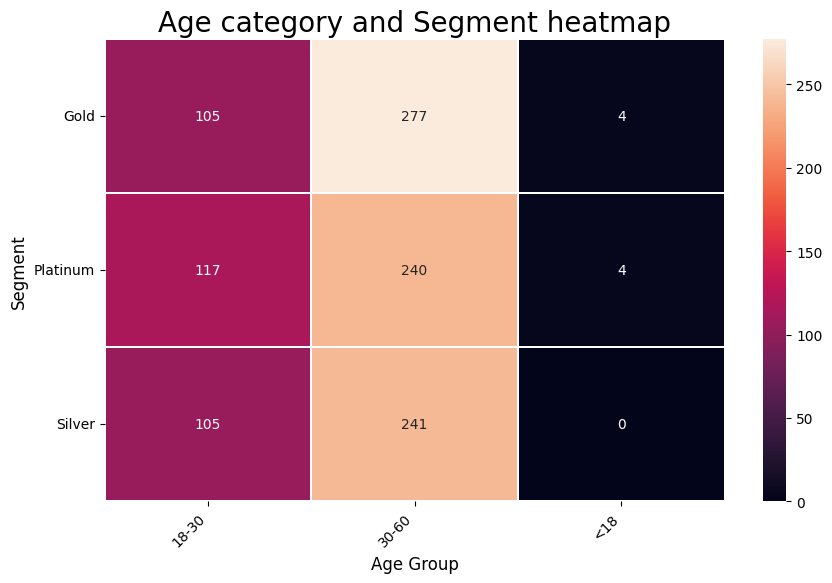

In [60]:
# To visualize
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

sns.heatmap(Age_segmant, annot=True, linewidths=0.1,fmt='g')

plt.title('Age category and Segment heatmap', fontsize=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [61]:
print("pvalue:",stats.chi2_contingency(Age_segmant)[1])

pvalue: 0.18488562214528276


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [62]:
claims_demo.claim_date.dt.year.unique()

array([2017, 2018], dtype=int64)

In [63]:
# As we need to determine if mean of claimed anount in 16-17 differs from mean in latest year which is 17-18.
# So we will perform 1 sample t test (Ttest_1sampResult) as mean of 16-17 is given

# First step - Get the data
claims_demo_16_17 = claims_demo.loc[claims_demo['claim_date'].dt.year == 2017, 'claim_amount']
# mean of population claims_demo_16_17 is given as $ 10,000
claims_demo_17_18 = claims_demo.loc[claims_demo['claim_date'].dt.year == 2018, 'claim_amount']


# In the below boxplots, we can clearly see there is no outliers in the data 

In [64]:
# Perform the test
print('As',stats.ttest_1samp(claims_demo_17_18, 10000)[1], '< 0.05')
print('We reject the null hypothesis')
print('')
print('Business concluision: The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000 seems to be true.')

As 1.985741363740185e-05 < 0.05
We reject the null hypothesis

Business concluision: The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000 seems to be true.


## 19. Is there any difference between age groups and insurance claims?

In [65]:
# In this we need to compare Amount claimed by differeny age groups
# so we will perform Anova

claims_demo_below_18 = claims_demo.loc[claims_demo['Age_group'] == '<18', 'claim_amount']
claims_demo_btw_18_30 = claims_demo.loc[claims_demo['Age_group'] == '18-30', 'claim_amount']
claims_demo_btw_30_60 = claims_demo.loc[claims_demo['Age_group'] == '30-60', 'claim_amount']

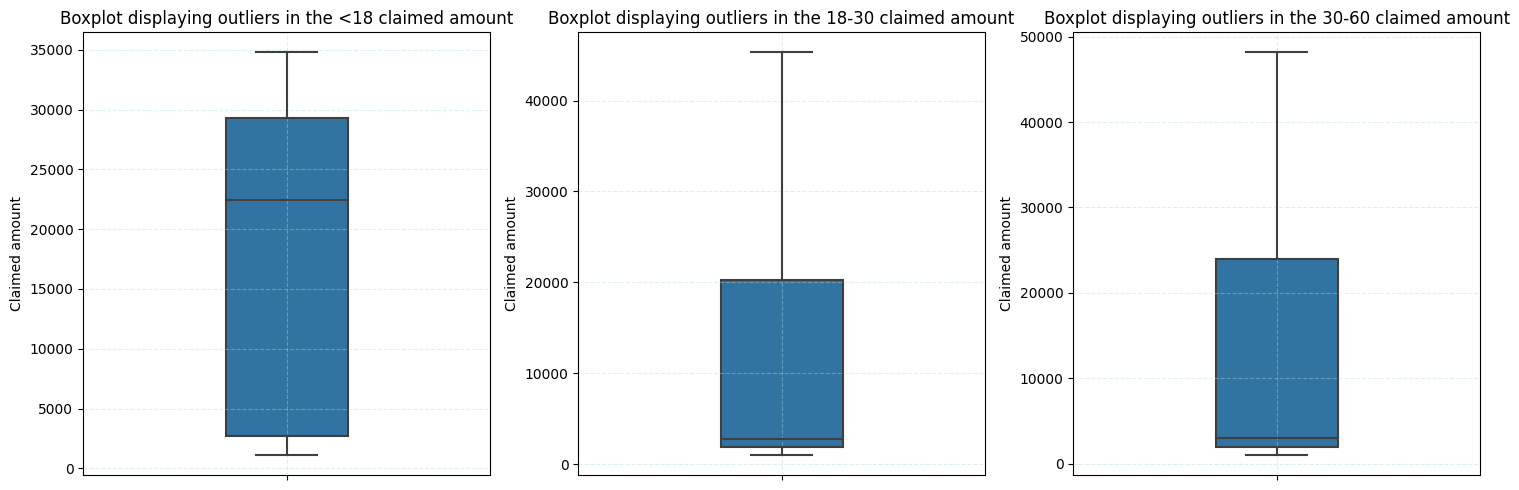

In [66]:
# To visualize if there is any Outlier in the data
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(y=claims_demo_below_18, width=0.3)
plt.title('Boxplot displaying outliers in the <18 claimed amount')
plt.ylabel('Claimed amount')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')


plt.subplot(1,3,2)
sns.boxplot(y=claims_demo_btw_18_30, width=0.3)
plt.title('Boxplot displaying outliers in the 18-30 claimed amount')
plt.ylabel('Claimed amount')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')


plt.subplot(1,3,3)
sns.boxplot(y=claims_demo_btw_30_60, width=0.3)
plt.title('Boxplot displaying outliers in the 30-60 claimed amount')
plt.ylabel('Claimed amount')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')

plt.tight_layout()
plt.show()

# As we can see there are no outliers in the data

In [67]:
# Fifth step - Perform the test
print('As',stats.f_oneway(claims_demo_below_18, claims_demo_btw_18_30, claims_demo_btw_30_60)[0],' > 0.05')
print('We fail to reject the null hypothesis')
print('')
print('Business conclusion: All the samples belongs to same population.')

As 1.7809621480481395  > 0.05
We fail to reject the null hypothesis

Business conclusion: All the samples belongs to same population.


## 20. Is there any relationship between total number of policy claims and the claimed amount?


In [68]:
# As per the above statement we need to find the relationship between total policy claimed and total claimed amount
# So we will perfom Pearson's test

# First step: Get the data

claims_demo.total_policy_claims
claims_demo.claim_amount

0       2980.00
1       2980.00
2       3369.50
3       1680.00
4       2680.00
         ...   
1095    3059.00
1096    1520.00
1097   23575.00
1098   25120.00
1099   36685.00
Name: claim_amount, Length: 1093, dtype: float64

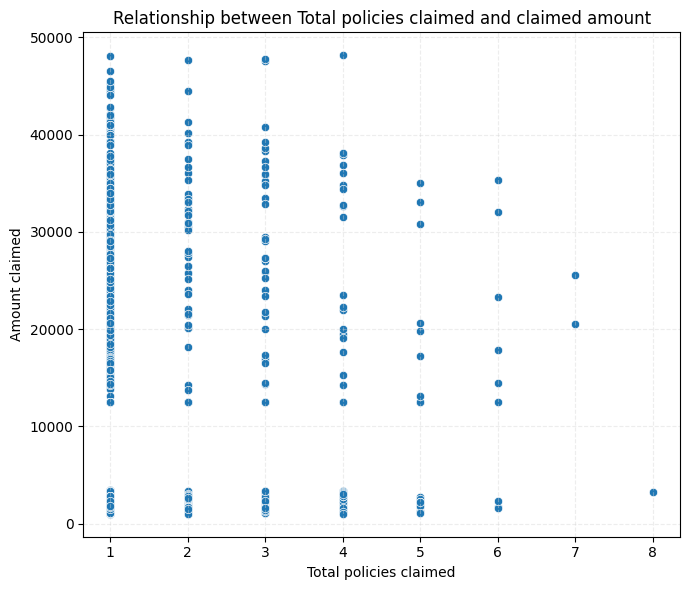

In [69]:
#Scatterplot of claims_demo.total_policy_claims and claims_demo.claim_amount to visualize the relationship between them


plt.figure(figsize=(7,6))
sns.scatterplot(x= claims_demo.total_policy_claims, y= claims_demo.claim_amount)

plt.title('Relationship between Total policies claimed and claimed amount')
plt.xlabel('Total policies claimed')
plt.ylabel('Amount claimed')

plt.grid(linestyle= '--',color= 'lightgray',alpha=.4)
plt.tight_layout()
plt.show()

In [70]:
print('A correlation coefficient of',claims_demo.total_policy_claims.corr(other=claims_demo.claim_amount),'indicates a very weak negative correlation between the two variables being analyzed.')

A correlation coefficient of -0.01692212886660061 indicates a very weak negative correlation between the two variables being analyzed.


In [71]:
# Fifth step - Perform the test

print('As p value (',stats.pearsonr(claims_demo.total_policy_claims, claims_demo.claim_amount)[1],') > 0.05, therefore we fail to reject the null hypothesis.')
print('')
print('A correlation coefficient of',stats.pearsonr(claims_demo.total_policy_claims, claims_demo.claim_amount)[0],'indicates a very weak negative correlation between the two variables being analyzed.')
print('')
print('Business conclusion: There is no significant relationship bwtween Total policies claimed and claimed amount.')

As p value ( 0.5762608479587007 ) > 0.05, therefore we fail to reject the null hypothesis.

A correlation coefficient of -0.016922128866600605 indicates a very weak negative correlation between the two variables being analyzed.

Business conclusion: There is no significant relationship bwtween Total policies claimed and claimed amount.
